In [1]:
import pandas as pd

df = pd.read_csv('billboard.csv')
df

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327890,327891,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018,42
327891,327892,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,1977,21
327892,327893,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,1981,21
327893,327894,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,1973,39


In [2]:
#PART A

In [3]:
group_data_by_performer_song = df.groupby(['performer','song'])
song_week_counts = group_data_by_performer_song['week'].count().reset_index()
top_10_songs = song_week_counts.sort_values(by='week', ascending=False).head(10)
top_10_songs.rename(columns={'week': 'count'}, inplace=True)
print(top_10_songs.to_string(index=False))

                                performer                                song  count
                          Imagine Dragons                         Radioactive     87
                               AWOLNATION                                Sail     79
                               The Weeknd                     Blinding Lights     76
                               Jason Mraz                           I'm Yours     76
                              LeAnn Rimes                       How Do I Live     69
                              OneRepublic                      Counting Stars     68
LMFAO Featuring Lauren Bennett & GoonRock                   Party Rock Anthem     68
                                    Jewel Foolish Games/You Were Meant For Me     65
                                    Adele                 Rolling In The Deep     65
                         Carrie Underwood                    Before He Cheats     64


In [4]:
#PART B

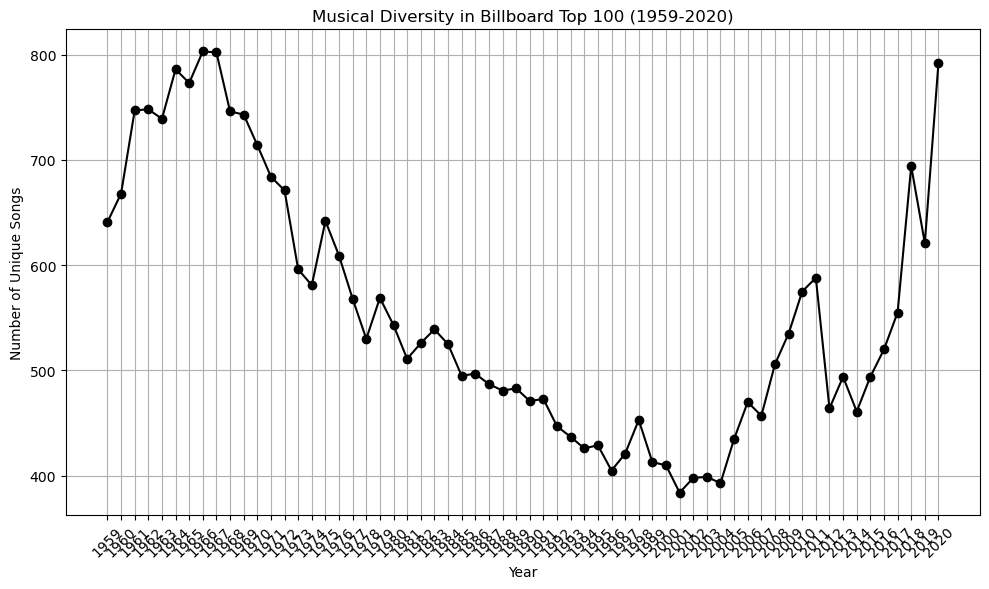

In [5]:
import matplotlib.pyplot as plt
df_filtered = df[(df['year'] != 1958) & (df['year'] != 2021)]

yearly_unique_songs = df_filtered.groupby('year')['song'].nunique()

plt.figure(figsize=(10, 6))
plt.plot(yearly_unique_songs.index, yearly_unique_songs.values, marker='o', linestyle='-', color='bLACK')
plt.xlabel('Year')
plt.ylabel('Number of Unique Songs')
plt.title('Musical Diversity in Billboard Top 100 (1959-2020)')
plt.grid(True)
plt.xticks(yearly_unique_songs.index, rotation=45)
plt.tight_layout()

plt.show()

In [6]:
#PART C

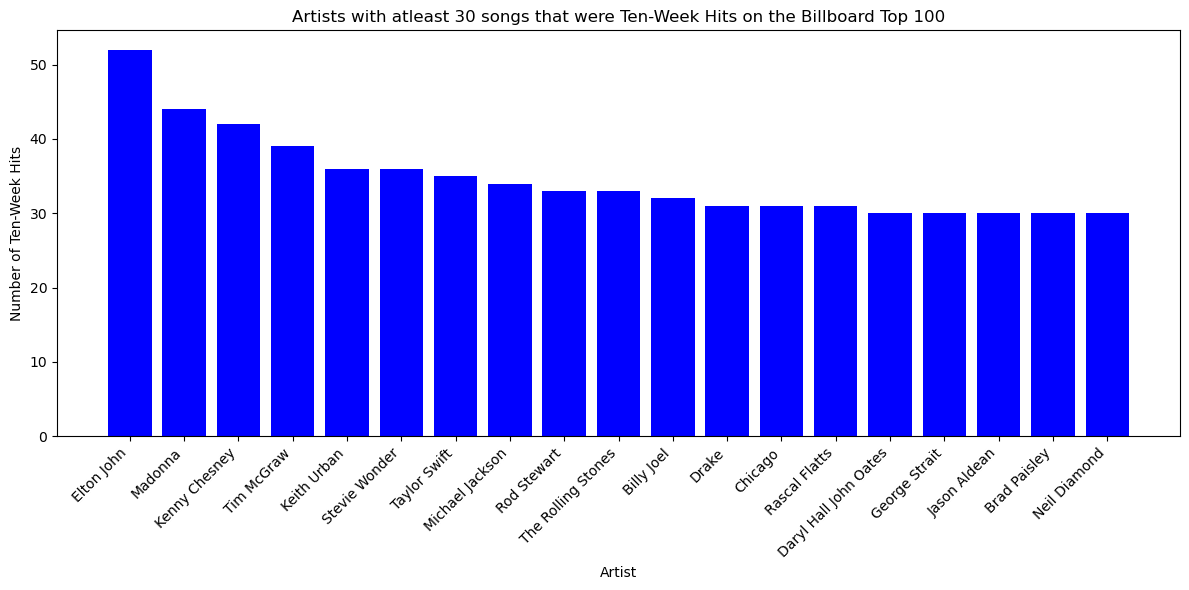

In [7]:
song_week_counts = df.groupby(['performer', 'song'])['week'].count().reset_index()
ten_week_hits = song_week_counts[song_week_counts['week'] >= 10]

artists_ten_week_hits = ten_week_hits.groupby('performer')['song'].count().reset_index()

popular_artists = artists_ten_week_hits[artists_ten_week_hits['song'] >= 30]

popular_artists = popular_artists.sort_values(by='song', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(popular_artists['performer'], popular_artists['song'], color='b')
plt.xlabel('Artist')
plt.ylabel('Number of Ten-Week Hits')
plt.title('Artists with atleast 30 songs that were Ten-Week Hits on the Billboard Top 100')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()